In [0]:
import os
from pathlib import Path
from keras.preprocessing import image
import matplotlib.pyplot as plt

In [65]:
#upload zip file

!ls
from zipfile import ZipFile
file_name = "images.zip"

with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

cats  horses  images	  sample_data  val_imagescats  val_imageshorses
dogs  humans  images.zip  val_images   val_imagesdogs  val_imageshumans
Done


In [0]:
import os 
folders = os.listdir("images")

In [67]:
for f in folders:
  path="images/"+f
  print(f+" "+str(len(os.listdir(path))))


dogs 202
humans 202
cats 202
horses 202


In [68]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
path="images/"
img=image.load_img("images/cats/cat.1.jpg")
print(type(img))

#numpy
#plt.imshow()

<class 'PIL.JpegImagePlugin.JpegImageFile'>


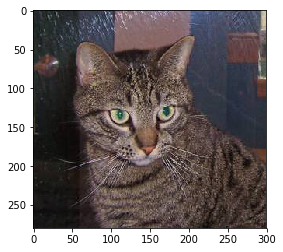

In [69]:
plt.imshow(img)
plt.show()

x=image.img_to_array(img)/255.0

In [0]:
import os , shutil

In [0]:
if not os.path.isdir("val_images"):
  os.mkdir("val_images")

In [73]:
classes = ["cats","dogs","horses","humans"]
#os.mkdir("val_images"+c) //(in for loop)it will make dir outside not in val_images folder

pth="val_images"

for c in classes:
  p=os.path.join("val_images",c)
  print(p)
  if not p:
    os.mkdir(p)

val_images/cats
val_images/dogs
val_images/horses
val_images/humans


In [76]:
split = 0.9

for f in os.listdir("images"):
  
  path1=os.path.join("val_images",f)
  path2=os.path.join("images",f)
  
  #print(path2)
  imgs=os.listdir(path2)
  print("Total files in "+f,end=" ")
  print(len(imgs))
  
  split_size=int(split*len(imgs))
  files_to_move=imgs[split_size:]
  print("length of files to move=",end=" ")
  print(len(files_to_move))
  
  for img_f in files_to_move:
    src=os.path.join("images",f,img_f)
    dest=os.path.join("val_images",f,img_f)
    shutil.move(src,dest)
    
print(type(files_to_move))
print(files_to_move)  #files_to_move = name of the images

Total files in dogs 202
length of files to move= 21
Total files in humans 202
length of files to move= 21
Total files in cats 202
length of files to move= 21
Total files in horses 181
length of files to move= 19
<class 'list'>
['horse-62.jpg', 'horse-76.jpg', 'horse-101.jpg', 'horse-46.jpg', 'horse-140.jpg', 'horse-58.jpg', 'horse-114.jpg', 'horse-64.jpg', 'horse-102.jpg', 'horse-89.jpg', 'horse-83.jpg', 'horse-37.jpg', 'horse-73.jpg', 'horse-82.jpg', 'horse-139.jpg', 'horse-178.jpg', 'horse-189.jpg', 'horse-195.jpg', 'horse-173.jpg']


In [79]:
print("Files in Training data")
for folder in os.listdir("images"):
  path=os.path.join("images",folder)
  imgs=os.listdir(path)
  print(len(imgs))
  
print("Files in validation data")
for folder in os.listdir("val_images"):
  path=os.path.join("val_images",folder)
  imgs=os.listdir(path)
  print(len(imgs))
  
    

Files in Training data
181
181
181
162
Files in validation data
21
21
21
40


In [7]:
from keras.layers import *
from keras.models import Sequential
model = Sequential()
                #no of filter,filter_size,activation,inputs-shape
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPool2D((2,2))) #filter_size=2,2  stride=2,2   incresing the receptive field
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))  #so we need more no of filters
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()


W0807 06:21:03.812686 140316396771200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0807 06:21:03.838472 140316396771200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0807 06:21:03.842264 140316396771200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0807 06:21:03.862517 140316396771200 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:3976: The name tf.nn.max_pool is deprecated. Please use tf.nn.max_pool2d instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
flatten_1 (Flatten)          (None, 147968)            0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                9470016   
__________

In [84]:
from keras.layers import *
from keras.models import Sequential
model = Sequential()
                #no of filter,filter_size,activation,inputs-shape
model.add(Conv2D(32,(3,3),activation="relu",input_shape=(150,150,3)))
model.add(MaxPool2D((2,2))) #filter_size=2,2  stride=2,2   incresing the receptive field
model.add(Conv2D(64,(3,3),activation="relu",input_shape=(28,28,1)))  #so we need more no of filters
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Conv2D(128,(3,3),activation="relu",input_shape=(28,28,1)))
model.add(MaxPool2D((2,2)))
model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(4,activation='softmax'))
model.summary()

# added more convolutional layers and maxPool layers increase the receptive field

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 128)       147584    
__________

In [0]:
## now we are not using fit method(best for small dataset) , we are using data_generators of keras 

In [0]:
from keras import optimizers         
adam=optimizers.adam(lr=1e-4)
model.compile(loss='categorical_crossentropy',optimizer=adam,metrics=["acc"])

In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
#ImageDataGenerator?

In [89]:
train_gen=ImageDataGenerator(rescale=1.0/255)
train_generator=train_gen.flow_from_directory("images/",target_size=(150,150),class_mode='categorical',batch_size=(32))

#validation generator
val_gen=ImageDataGenerator(rescale=1.0/255)
val_generator=val_gen.flow_from_directory("val_images/",target_size=(150,150),class_mode='categorical',batch_size=(32))

Found 705 images belonging to 4 classes.
Found 103 images belonging to 4 classes.


In [90]:
print(train_generator.labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 

In [91]:
for x,y in train_generator:
  print(x.shape)  
  print(y.shape)  #one_hot
  break

(32, 150, 150, 3)
(32, 4)


In [0]:
 #model.fit_generator?

In [98]:
                                   #batch size=32 , 32*7=224 , total_images=210
history=model.fit_generator(train_generator,steps_per_epoch=7,epochs=50,validation_data=val_generator,validation_steps=4)

Epoch 1/50
7/7 [==============================] - 12s 2s/step - loss: 0.8023 - acc: 0.6875 - val_loss: 1.0071 - val_acc: 0.6117
Epoch 2/50
7/7 [==============================] - 11s 2s/step - loss: 0.7377 - acc: 0.7411 - val_loss: 0.9747 - val_acc: 0.5340
Epoch 3/50
7/7 [==============================] - 10s 1s/step - loss: 0.9304 - acc: 0.5374 - val_loss: 1.7742 - val_acc: 0.3883
Epoch 4/50
7/7 [==============================] - 11s 2s/step - loss: 1.0487 - acc: 0.5580 - val_loss: 1.0706 - val_acc: 0.4757
Epoch 5/50
7/7 [==============================] - 11s 2s/step - loss: 0.7920 - acc: 0.7098 - val_loss: 1.0690 - val_acc: 0.4466
Epoch 6/50
7/7 [==============================] - 10s 1s/step - loss: 0.9091 - acc: 0.6375 - val_loss: 1.0250 - val_acc: 0.6117
Epoch 7/50
7/7 [==============================] - 12s 2s/step - loss: 0.7167 - acc: 0.7589 - val_loss: 1.1760 - val_acc: 0.4951
Epoch 8/50
7/7 [==============================] - 11s 2s/step - loss: 0.7507 - acc: 0.7232 - val_loss: 1

In [0]:
acc =   history.history['acc']
val_acc =   history.history['val_acc']
loss =   history.history['loss']
val_loss =   history.history['val_loss']

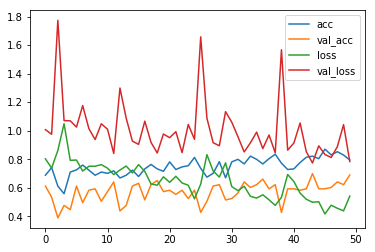

In [100]:
plt.plot(acc,label="acc")
plt.plot(val_acc,label="val_acc")

plt.plot(loss,label="loss")
plt.plot(val_loss,label="val_loss")

plt.legend()
plt.show()

#not smooth because training data is small
# acc is decreasing beacause of overfiting